#IMDB MOVIE REVIEW

SussexBudgetProductions wants to produce a film which will give good money returns and profit. For producing the film, we will need all the details of the type of film we can produce to gain good returns. For this purpose I am analyzing the data in IMDB data set for movies. I will be doing a deep Exploratory data analysis on the IMDB data and figure out the trends and verify the hypothesis with the data available. 

For doing this I will be spliting the data into 2 types - Dev and Test. I will be doing the EDA on dev set and checking the hypothesis on test set.

In [194]:

myfile='movie_metadata.csv'
#standard imports for when working with pandas
import numpy as np
#matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd

#creating dev and test dictionary sets 
dev = {}
test = {}

myfile = r'C:\Users\SHALAKA\Downloads\PG2021\movie_metadata.csv'

#read the movie metadata file into a dataframe in pandas.
df = pd.read_csv(myfile,index_col=None)

# As there are many duplicate in the data, removing the duplicate entries
df = df.drop_duplicates(subset=['movie_title', 'director_name', 'actor_1_name'])

# Removing the columns that are not required
df = df.drop(['color', 'facenumber_in_poster', 'movie_imdb_link', 'aspect_ratio'], axis=1)

df['gross']=df['gross']//1000000
df['budget']=df['budget']//1000000

# Creating columns in the data set for maximum votes of users and the total number of likes of actors and director
df['max_user_votes']=(df['num_critic_for_reviews']+df['num_user_for_reviews']+df['num_voted_users'])//3
df['Popular']=(df['director_facebook_likes']+df['actor_3_facebook_likes']+df['actor_1_facebook_likes']+df['actor_2_facebook_likes']+df['movie_facebook_likes'])//5


# converting the float type to int

int_type = []
for i in list(df.columns.values):
    if type(df[i][5])==np.float64:
        int_type.append(i)

        
# Splitting the data into two parts 

df = df.sample(frac=1, random_state = 0)

headers = list(df.columns.values)
midpt = int(len(df)/2)

for head in headers:
    dev[head] = df[head][:midpt]
    test[head] = df[head][midpt:len(df)]
    
dev = pd.DataFrame.from_dict(dev)
test = pd.DataFrame.from_dict(test)
dev.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,max_user_votes,Popular
4197,James Ponsoldt,220.0,95.0,53.0,478.0,Jennifer Jason Leigh,8000.0,6.0,Comedy|Drama|Romance,Shailene Woodley,...,English,USA,R,2.0,2013.0,1000.0,7.1,10000,35329.0,3906.0
1023,NaN,28.0,43.0,NaN,600.0,Tony Curran,3000.0,NaN,Action|Drama|Sci-Fi,Julie Benz,...,English,USA,TV-MA,NaN,NaN,845.0,7.0,0,11237.0,NaN
3630,Sam Peckinpah,147.0,144.0,541.0,242.0,Warren Oates,682.0,NaN,Action|Adventure|Western,William Holden,...,English,USA,R,6.0,1969.0,288.0,8.0,0,21208.0,350.0
1725,Simon West,130.0,92.0,165.0,700.0,Michael Angarano,26000.0,NaN,Action|Crime|Drama|Thriller,Jason Statham,...,English,USA,R,30.0,2015.0,947.0,5.6,0,12243.0,5562.0
883,Ron Maxwell,84.0,280.0,33.0,67.0,Bruce Boxleitner,789.0,12.0,Drama|History|War,Billy Campbell,...,English,USA,PG-13,56.0,2003.0,640.0,6.3,953,4598.0,496.0


In [195]:
test.head()

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,max_user_votes,Popular
483,Dominic Sena,166.0,99.0,57.0,820.0,Don Cheadle,20000.0,69.0,Action|Crime|Thriller,Hugh Jackman,...,English,USA,R,80.0,2001.0,3000.0,6.5,0,52080.0,4775.0
4242,Jaume Balagueró,252.0,78.0,57.0,7.0,Pablo Rosso,120.0,NaN,Horror,Manuela Velasco,...,Spanish,Spain,R,1.0,2007.0,9.0,7.5,15000,44029.0,3038.0
463,Albert Hughes,325.0,118.0,117.0,10000.0,Mila Kunis,18000.0,94.0,Action|Adventure|Drama|Thriller,Denzel Washington,...,English,USA,R,80.0,2010.0,15000.0,6.9,20000,75985.0,12623.0
108,Duncan Jones,275.0,123.0,0.0,648.0,Callum Rennie,3000.0,46.0,Action|Adventure|Fantasy,Dominic Cooper,...,English,USA,PG-13,160.0,2016.0,716.0,7.3,89000,37555.0,18672.0
4921,Majid Majidi,46.0,89.0,373.0,27.0,Amir Farrokh Hashemian,36.0,0.0,Drama|Family,Bahare Seddiqi,...,Persian,Iran,PG,0.0,1997.0,35.0,8.5,0,9352.0,94.0


In [196]:
dev.columns

Index(['director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'plot_keywords', 'num_user_for_reviews', 'language',
       'country', 'content_rating', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'movie_facebook_likes',
       'max_user_votes', 'Popular'],
      dtype='object')

In [197]:
 # check for null entries
    
dev.isnull().sum()


director_name                 56
num_critic_for_reviews        26
duration                       8
director_facebook_likes       56
actor_3_facebook_likes         6
actor_2_name                   2
actor_1_facebook_likes         1
gross                        446
genres                         0
actor_1_name                   1
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                   6
plot_keywords                 67
num_user_for_reviews          10
language                       6
country                        3
content_rating               144
budget                       238
title_year                    59
actor_2_facebook_likes         2
imdb_score                     0
movie_facebook_likes           0
max_user_votes                26
Popular                       60
dtype: int64

In [198]:
# Imputing the null entries with the median of each column
dev = dev.fillna(dev.median())

Here I sort the mean imdb score and budget across films by genre. Set a minimum imdb score and filter according to that. We are interested only in high scores so we are only looking at films with good ratings.

In [199]:

#set the maximum possible budget to 500 000
max_budget = 500000

topgenreseries=dev.groupby('director_name')['imdb_score','budget','gross'].mean()
#find the details of films with less than the maximum budget
budget_genres = topgenreseries[topgenreseries['budget']<=max_budget]
budget_genres = budget_genres.sort_values('imdb_score',ascending=False)
budget_genres

<ipython-input-199-ec5f0e050200>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topgenreseries=dev.groupby('director_name')['imdb_score','budget','gross'].mean()


,imdb_score,budget,gross
director_name,,,
John Blanchard,9.5,20.0,25.0
Cary Bell,8.7,0.0,25.0
Sadyk Sher-Niyaz,8.7,1.0,25.0
Mike Mayhall,8.6,5.0,25.0
Moustapha Akkad,8.4,35.0,25.0
...,...,...,...
Alex Zamm,2.3,10.0,0.0
Lawrence Guterman,2.2,84.0,17.0
Georgia Hilton,2.2,20.0,25.0


Here I am calculating the profit of the movies. After calculating the profit I will use it to calculate the profit each actor has earned from the total number of likes on facebook page. This will give us an idea if the success of the movie depends on the popularity of the actor

<ipython-input-200-eefcd9a9887b>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  A1 = dev.groupby('actor_1_name')['imdb_score', 'profit', 'actor_1_facebook_likes'].mean()
<ipython-input-200-eefcd9a9887b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['prof_value'] = result['profit']/TotalMean


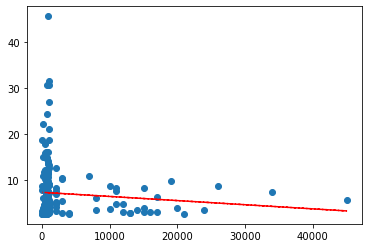

                       imdb_score      profit  actor_1_facebook_likes  \
actor_1_name                                                            
Henry Thomas             7.900000  424.000000                   861.0   
Wayne Knight             8.100000  293.000000                   967.0   
Alexander Gould          8.200000  286.000000                  1000.0   
Rupert Everett           7.200000  286.000000                   692.0   
Josh Gad                 7.600000  250.000000                  1000.0   
Catherine Dyer           7.700000  226.000000                   768.0   
Kathleen Freeman         7.900000  207.000000                   145.0   
Ellen Burstyn            8.000000  196.000000                  1000.0   
Olivia Newton-John       7.200000  175.000000                  1000.0   
Phaldut Sharma           7.800000  174.000000                    39.0   
Paul Hogan               6.500000  166.000000                   442.0   
Michael Gough            6.500000  150.000000      

In [200]:
dev['profit'] = dev['gross']-dev['budget']

A1 = dev.groupby('actor_1_name')['imdb_score', 'profit', 'actor_1_facebook_likes'].mean()

result = A1[A1['profit']>0]


TotalMean = dev['profit'].mean()
result['prof_value'] = result['profit']/TotalMean
result = result.sort_values('prof_value',ascending=False)
result = result.head(200)



x= result['actor_1_facebook_likes']
y= result['prof_value']

plt.scatter(x,y)

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

print(result.head(50))
     

As we can see from the above graph there are actors with less fan follow base but still their movies have earned profits and movies of the actors with more likes on facebook does not have significant amount of profit. So the idea that the success of the movie depends on actors facebook likes is not true here

Next I am plotting a graph of the profit value of each actor and imdb score to see if the profits earned by the actor suppurts high rates on IMDB. As you can see from the graph the idea holds true. That means if the IMDB score and actor's individual profit are related to each other.

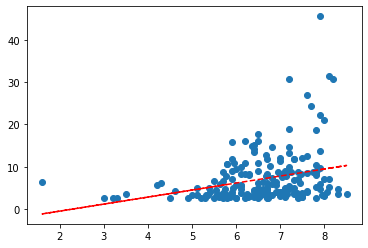

                       imdb_score      profit  actor_1_facebook_likes  \
actor_1_name                                                            
Henry Thomas             7.900000  424.000000                   861.0   
Wayne Knight             8.100000  293.000000                   967.0   
Alexander Gould          8.200000  286.000000                  1000.0   
Rupert Everett           7.200000  286.000000                   692.0   
Josh Gad                 7.600000  250.000000                  1000.0   
Catherine Dyer           7.700000  226.000000                   768.0   
Kathleen Freeman         7.900000  207.000000                   145.0   
Ellen Burstyn            8.000000  196.000000                  1000.0   
Olivia Newton-John       7.200000  175.000000                  1000.0   
Phaldut Sharma           7.800000  174.000000                    39.0   
Paul Hogan               6.500000  166.000000                   442.0   
Michael Gough            6.500000  150.000000      

In [201]:
x= result['imdb_score']
y= result['prof_value']

plt.scatter(x,y)

z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

print(result.head(50))

In [202]:
genreseries=dev.groupby('genres')['imdb_score','budget', 'gross'].mean()
#set the minimum imdb score that I care about to 8
min_imdb_score=8 
top_rated_genre = genreseries[genreseries['imdb_score']>min_imdb_score]
top_rated_genre = top_rated_genre.sort_values('imdb_score', ascending=False)
#print the genres for inspection
top_rated_genre.head()

<ipython-input-202-d50fdaa2e11c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genreseries=dev.groupby('genres')['imdb_score','budget', 'gross'].mean()


,imdb_score,budget,gross
genres,,,
Action|Adventure|Crime|Drama|Sci-Fi|Thriller,8.8,20.0,25.0
Action|Biography|Drama|History,8.7,1.0,25.0
Adventure|Animation|Drama|Family|Musical,8.5,45.0,422.0
Crime|Drama|Fantasy|Mystery,8.5,60.0,136.0
Action|Animation|Crime|Sci-Fi|Thriller,8.4,3.0,25.0


Here I am grouping the actor_1_name with imdb score, gross, profit, budget with profit greater than 0 and plotting the graph to see the relation between budget and profit. As we can see from the graph the higher the budget the higher is the profit

<ipython-input-203-cc7a69e8f952>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  budgetseries = dev.groupby('actor_1_name')['imdb_score', 'gross', 'profit', 'budget'].mean()


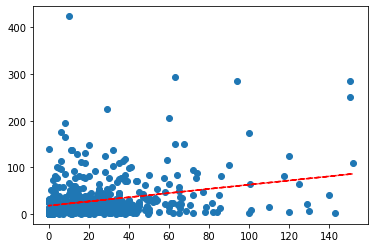

In [203]:
budgetseries = dev.groupby('actor_1_name')['imdb_score', 'gross', 'profit', 'budget'].mean()
budgetcheck = budgetseries[budgetseries['profit']>0]
budgetcheck = budgetcheck.sort_values('profit', ascending = False)
budgetcheck.head(10)

x1= budgetcheck['budget']
y1= budgetcheck['profit']

plt.scatter(x1,y1)

z=np.polyfit(x1,y1,1)
p=np.poly1d(z)
plt.plot(x1,p(x1),"r--")

plt.show()




Here I have grouped the numeric values with respect to genres and plotted a graph of of IMDB score with respect to profit. We can see from the graph that even with less IMDB score the profits are high. 

<ipython-input-225-da4e240a2fdb>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  genreseries = dev.groupby('genres')['imdb_score', 'gross', 'profit', 'budget'].mean()


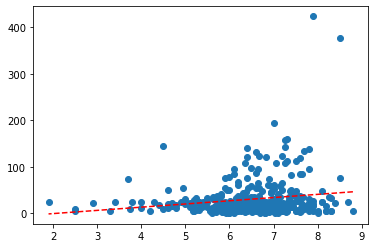

,imdb_score,gross,profit,budget
genres,,,,
Action|Adventure|Crime|Drama|Sci-Fi|Thriller,8.800000,25.000000,5.000000,20.000000
Action|Biography|Drama|History,8.700000,25.000000,24.000000,1.000000
Adventure|Animation|Drama|Family|Musical,8.500000,422.000000,377.000000,45.000000
Crime|Drama|Fantasy|Mystery,8.500000,136.000000,76.000000,60.000000
Action|Animation|Crime|Sci-Fi|Thriller,8.400000,25.000000,22.000000,3.000000
Biography|Drama|History|Music,8.300000,51.000000,33.000000,18.000000
Comedy|Mystery|Thriller,8.300000,25.000000,5.000000,20.000000
Drama|Fantasy|Horror|Mystery,8.300000,25.000000,5.000000,20.000000
Adventure|Drama|War,8.250000,73.500000,34.500000,39.000000


In [225]:
genreseries = dev.groupby('genres')['imdb_score', 'gross', 'profit', 'budget'].mean()
genrecheck = genreseries[genreseries['profit']>0]
genrecheck = genrecheck.sort_values('imdb_score', ascending = False)
genrecheck.head(10)

g1= genrecheck['imdb_score']
g2= genrecheck['profit']

plt.scatter(g1,g2)

z=np.polyfit(g1,g2,1)
p=np.poly1d(z)
plt.plot(g1,p(g1),"r--")

plt.show()

genrecheck.head(50)



In [205]:

# check the meadin of IMDB score
genrecheck['imdb_score'].median()

genrecheck[genrecheck['imdb_score']==6.6]

,imdb_score,gross,profit,budget
genres,,,,
Action|Drama|Mystery|Thriller|War,6.6,58.0,12.0,46.0
Adventure|Animation|Drama|Family|History|Musical|Romance,6.6,141.0,86.0,55.0
Adventure|Animation|Comedy|Family|Fantasy|Musical,6.6,219.5,132.0,87.5
Action|Adventure|Drama|Thriller,6.6,112.0,21.6,90.4
Comedy|Drama|Reality-TV|Romance,6.6,25.0,5.0,20.0
Drama|Fantasy|Horror|Mystery|Thriller,6.6,155.0,55.0,100.0


Here I am grouping the the likes of all the acotrs together and then finding out which trios of actors are most common. Below I have made a new column 'popularity' to add the actors information

In [206]:
dev.insert(11, column = 'Popularity', value = dev.loc[:,['actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes']].sum(axis=1))


In [207]:
top_popular_actors = dev.sort_values(by = 'Popularity', ascending = False, ignore_index = True).loc[0:4,:]
top_popular_actors

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,max_user_votes,Popular,profit
0,Travis Romero,5.0,67.0,4.0,2000.0,Lorraine Ziff,260000.0,25.0,Drama|Thriller,Matthew Ziff,...,USA,NaN,0.0,2013.0,21000.0,3.9,0,118.0,56600.0,25.0
1,John Stockwell,2.0,90.0,134.0,354.0,T.J. Storm,260000.0,25.0,Action,Matthew Ziff,...,USA,NaN,17.0,2016.0,454.0,9.1,0,83.0,52188.0,8.0
2,John Gulager,130.0,95.0,38.0,898.0,Eric Dane,164000.0,25.0,Action|Comedy|Horror|Thriller,Krista Allen,...,USA,R,3.0,2005.0,2000.0,6.4,0,8641.0,33387.0,22.0
3,Nimród Antal,107.0,88.0,190.0,163.0,Fred Ward,137000.0,15.0,Action|Crime|Thriller,Andrew Fiscella,...,USA,PG-13,27.0,2009.0,459.0,5.7,0,8817.0,27562.0,-12.0
4,Andrew Douglas,220.0,90.0,15.0,16000.0,Chloë Grace Moretz,87000.0,64.0,Drama|Horror|Mystery|Thriller,Jimmy Bennett,...,USA,R,19.0,2005.0,17000.0,6.0,0,27213.0,24003.0,45.0


In [208]:
top_popular_trios = dev.sort_values(by= 'Popularity', ascending =  False, ignore_index = True).loc[0:10,['actor_1_name', 'actor_2_name', 'actor_3_name']].values.tolist()
top_popular_trios

[['Matthew Ziff', 'Lorraine Ziff', 'Michael Biehn'],
 ['Matthew Ziff', 'T.J. Storm', 'Sam Medina'],
 ['Krista Allen', 'Eric Dane', 'Henry Rollins'],
 ['Andrew Fiscella', 'Fred Ward', 'Lorna Raver'],
 ['Jimmy Bennett', 'Chloë Grace Moretz', 'Ryan Reynolds'],
 ['Jimmy Bennett', 'Bruce Willis', 'Ransford Doherty'],
 ['Jimmy Bennett', 'Harrison Ford', 'Mary Lynn Rajskub'],
 ['Jimmy Bennett', 'Mike Vogel', 'Andre Braugher'],
 ['Jimmy Bennett', 'CCH Pounder', 'Aryana Engineer'],
 ['Jimmy Bennett', 'Joey Lauren Adams', 'Matthew Lawrence'],
 ['Leonardo DiCaprio', 'Tom Hardy', 'Joseph Gordon-Levitt']]

In [209]:
# Grouping by language

language_series = dev.groupby('language')['imdb_score', 'gross', 'budget', 'profit'].mean()
language_check = language_series[language_series['profit']>0]
language_check = language_check.sort_values('profit', ascending = False)
language_series.head(20)



<ipython-input-209-6e94e5a20c9c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  language_series = dev.groupby('language')['imdb_score', 'gross', 'budget', 'profit'].mean()


,imdb_score,gross,budget,profit
language,,,,
Arabic,8.100000,25.000000,1.000000,24.000000
Bosnian,4.300000,0.000000,13.000000,-13.000000
Cantonese,7.116667,10.000000,13.166667,-3.166667
Chinese,5.950000,25.000000,16.000000,9.000000
Danish,8.166667,8.666667,8.000000,0.666667
Dari,7.500000,8.000000,10.000000,-2.000000
Dutch,7.300000,8.333333,3.333333,5.000000
Dzongkha,7.500000,0.000000,1.000000,-1.000000
English,6.381054,45.379355,32.797909,12.581446


Plotting the graph of total duration to see the average time of good rated movies 

C:\Users\SHALAKA\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


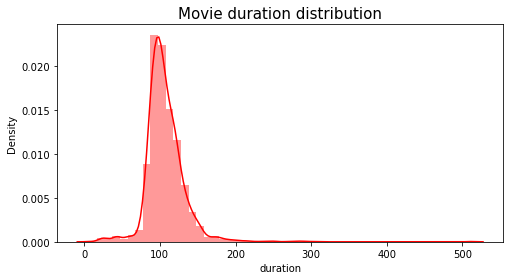

In [210]:
import seaborn as sns
plt.figure(figsize = [8,4])
run = sns.distplot(dev['duration'], color = 'red')
run.axes.set_title("Movie duration distribution", fontsize = 15)
run.set_xlabel('duration', fontsize = 10)
plt.show()




Here I am grouping director name and actor names with all the numeric values with  profit >0 and IMDB score greater than mininum IMDB score to see which actors and directors have good rated movies and check if the movie's success depends upon the cast and director of the movie.

In [211]:
dirseries=dev.groupby('director_name')['imdb_score','budget','gross','profit'].mean()
actorseries=dev.groupby(['actor_1_name','actor_2_name','actor_3_name'])['imdb_score','budget','gross','profit'].mean()
#set the minimum imdb score that I care about to 8
min_imdb_score=8 
top_rated_genre = genreseries[genreseries['imdb_score']>min_imdb_score]
top_director = dirseries[dirseries['imdb_score']>min_imdb_score]
top_actor = actorseries[actorseries['imdb_score']>min_imdb_score]


top_rated_genre = top_rated_genre.sort_values('profit', ascending=False)
top_director = top_director.sort_values('profit', ascending=False)
top_actor = top_actor.sort_values('profit', ascending=False)


#print the genres for inspection
top_rated_genre.head()

<ipython-input-211-5ab0d05b7f63>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dirseries=dev.groupby('director_name')['imdb_score','budget','gross','profit'].mean()
<ipython-input-211-5ab0d05b7f63>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  actorseries=dev.groupby(['actor_1_name','actor_2_name','actor_3_name'])['imdb_score','budget','gross','profit'].mean()


,imdb_score,gross,profit,budget
genres,,,,
Adventure|Animation|Drama|Family|Musical,8.50,422.0,377.0,45.0
Crime|Drama|Fantasy|Mystery,8.50,136.0,76.0,60.0
Adventure|Drama|Thriller|Western,8.10,183.0,48.0,135.0
Adventure|Drama|War,8.25,73.5,34.5,39.0
Biography|Drama|History|Music,8.30,51.0,33.0,18.0


In [217]:
top_director.head(5)

,imdb_score,budget,gross,profit
director_name,,,,
Joss Whedon,8.100,220.00,623.0,403.00
Christopher Nolan,8.375,160.25,335.0,174.75
Pete Docter,8.100,115.00,289.0,174.00
James Gunn,8.100,170.00,333.0,163.00
John G. Avildsen,8.100,0.00,117.0,117.00


In [218]:
top_actor.head(5)

,,,imdb_score,budget,gross,profit
actor_1_name,actor_2_name,actor_3_name,,,,
Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,8.1,220.0,623.0,403.0
Matthew Broderick,Nathan Lane,Niketa Calame,8.5,45.0,422.0,377.0
Christian Bale,Heath Ledger,Morgan Freeman,9.0,185.0,533.0,348.0
Wayne Knight,Ariana Richards,Bob Peck,8.1,63.0,356.0,293.0
Alexander Gould,Stephen Root,Brad Garrett,8.2,94.0,380.0,286.0




Plotting heat map for imdb score, budget and profit



<AxesSubplot:xlabel='profit', ylabel='budget'>

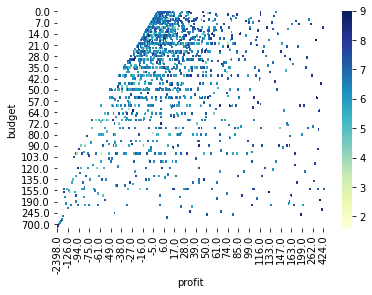

In [212]:
heatmap1_data = pd.pivot_table(dev, values='imdb_score', 
                     index=['budget'], 
                     columns='profit')

sns.heatmap(heatmap1_data, cmap="YlGnBu")

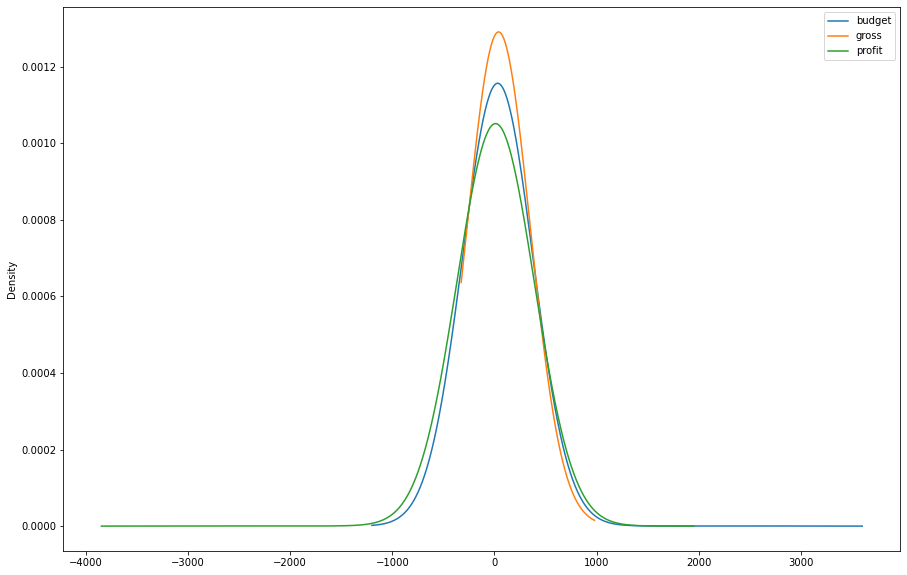

In [219]:
# Plotting the bell curve to check the probability distribution

kdeplot = dev[['budget','gross','profit']]
s = kdeplot
ax = s.plot.kde(bw_method=5, figsize=(15,10))



Here I am checking for the corelation between the total actors like and profit. We can see from the graph that the likes of the actors and profit are showing us that movies with good cast earn good profits.

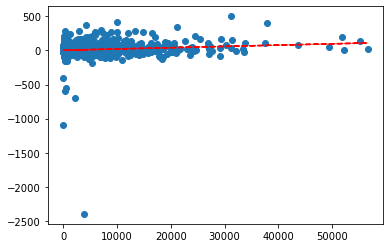

In [221]:


m = dev['Popular']
n = dev['profit']

plt.scatter(m,n)

o = np.polyfit(m, n, 1)
q = np.poly1d(o)
plt.plot(m,q(m),"r--")

plt.show()

I am grouping the movie actors and directors with the numeric values to check the profit with budget less than 500K and profit > 0. We can see that the movies with higher cast likes have good profit and IMDB rating. Here we can conclude that for a movie to be succssful and profitable the cast of the movie and its genre should be good. 

In [223]:
nullseries=dev.groupby(['director_name','actor_1_name','actor_2_name','actor_3_name','genres'])['imdb_score','budget','profit','Popular'].mean()
nullseries=nullseries[nullseries['profit']>0]
nullseries=nullseries[nullseries['imdb_score']>8]
nullseries=nullseries[nullseries['budget']<50]
nullseries=nullseries.sort_values('profit',ascending=False)
nullseries.head(10)

<ipython-input-223-8aff5fda7427>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nullseries=dev.groupby(['director_name','actor_1_name','actor_2_name','actor_3_name','genres'])['imdb_score','budget','profit','Popular'].mean()


,,,,,imdb_score,budget,profit,Popular
director_name,actor_1_name,actor_2_name,actor_3_name,genres,,,,
Roger Allers,Matthew Broderick,Nathan Lane,Niketa Calame,Adventure|Animation|Drama|Family|Musical,8.5,45.0,377.0,4152.0
Irvin Kershner,Harrison Ford,Kenny Baker,Anthony Daniels,Action|Adventure|Fantasy|Sci-Fi,8.8,18.0,272.0,5965.0
M. Night Shyamalan,Bruce Willis,Haley Joel Osment,Olivia Williams,Drama|Mystery|Thriller,8.1,40.0,253.0,6153.0
John Lasseter,Tom Hanks,John Ratzenberger,Jim Varney,Adventure|Animation|Comedy|Family|Fantasy,8.3,30.0,161.0,3457.0
Gus Van Sant,Robin Williams,Matt Damon,Minnie Driver,Drama,8.3,10.0,128.0,18945.0
John G. Avildsen,Sylvester Stallone,Burgess Meredith,Carl Weathers,Drama|Sport,8.1,0.0,117.0,2974.0
Clint Eastwood,Clint Eastwood,Morgan Freeman,Frances Fisher,Drama|Western,8.3,14.0,87.0,10727.0
Steven Spielberg,Liam Neeson,Embeth Davidtz,Caroline Goodall,Biography|Drama|History,8.9,22.0,74.0,14001.0
David Fincher,Morgan Freeman,Brad Pitt,Reg E. Cathey,Crime|Drama|Mystery|Thriller,8.6,33.0,67.0,16472.0


In [213]:
#set the maximum possible budget to 500 000
max_budget = 500000
topgenreseries=dev.groupby('genres')['imdb_score','budget','gross'].mean()
#find the details of films with less than the maximum budget
budget_genres = topgenreseries[topgenreseries['budget']<max_budget]
budget_genres = budget_genres.sort_values('imdb_score',ascending=False)
budget_genres.head()

<ipython-input-213-b675bb1eeb72>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  topgenreseries=dev.groupby('genres')['imdb_score','budget','gross'].mean()


,imdb_score,budget,gross
genres,,,
Action|Adventure|Crime|Drama|Sci-Fi|Thriller,8.8,20.0,25.0
Action|Biography|Drama|History,8.7,1.0,25.0
Crime|Drama|Fantasy|Mystery,8.5,60.0,136.0
Adventure|Animation|Drama|Family|Musical,8.5,45.0,422.0
Adventure|Biography|Drama|History|War,8.4,15.0,6.0


The Documentary|Family genre seems to be well-rated and within our budget. Taking a look at the details more closely we can see that there is actually only one film that meets the criteria of budget and imdb rating:

In [214]:
df[df['genres']=='Documentary|Family']

,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes,max_user_votes,Popular
4945,Amal Al-Agroobi,NaN,62.0,58.0,NaN,NaN,NaN,NaN,Documentary|Family,NaN,...,Arabic,United Arab Emirates,NaN,0.0,2013.0,NaN,8.2,54,NaN,NaN


After doing the analysis of the IMDB data I have formulated the below hypothesis :
    
Null Hypothesis(H0): The movies with greater IMDB score make profits of the movie
    
Alternate Hypothesis(H1): The greater IMDB score does not gaurantee profits of the movie
    
For doing the hypothesis I will be doing two sided T test

taking p value = 0.05.

If the value of the T-test is less than the P value we will reject the hypothesis. 

In [227]:
from scipy import stats
from statsmodels.stats import weightstats as stests

test = test.fillna(test.median())

test['profit']=test['gross']-test['budget']
test['average_votes']=(test['num_critic_for_reviews']+test['num_user_for_reviews']+test['num_voted_users'])//3
test['acclamation']=(test['director_facebook_likes']+test['actor_3_facebook_likes']+test['actor_1_facebook_likes']+test['actor_2_facebook_likes']+test['movie_facebook_likes'])//5


testseries=test.groupby(['director_name','actor_1_name','actor_2_name','actor_3_name','genres'])['imdb_score','budget','profit','acclamation'].mean()
testseries=testseries[testseries['profit']>0]
testseries=testseries[testseries['imdb_score']>8]
testseries=testseries[testseries['budget']<50]
testseries=testseries.sort_values('profit',ascending=False)


ztest ,pval1 = stests.ztest(test['imdb_score'], x2=test['profit'], value=test['profit'].mean(),alternative='two-sided')
print(float(pval1))
if pval1<0.05:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

0.8208315200480769
Accept null hypothesis


<ipython-input-227-33ccffd8782a>:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  testseries=test.groupby(['director_name','actor_1_name','actor_2_name','actor_3_name','genres'])['imdb_score','budget','profit','acclamation'].mean()


# Summary

I examined the IMDB data to look for appropriate movies and find a trend in the movies for analyzing whcih type of movie should be produced for earing maximum profits and success. For analyzing the data I divided the data into 2 parts dev and slpit. The data analysis was done on dev data set and the testing was done on test data set.


Report what you did and what you found:

I examined whether there are films with specific genre that get more profit and found that Sci-fi, Drama, Thriller have more number of votes from users and their budget is also less with good IMDB rating.

I also checked if thete is any relation between the cast of the movie and profit. Below is my observation :
    1. I searched for trios of the actors who have worked toghter more frequently in a movie and the movie has earned profits          with good IMDB rating. I found that there are few examples of such cases where the actors who have worked toghter have          earned more profits.
    2. I searched for the total likes of the actors and director and the observation was that the actors with more number of            likes earned more prfits in the movie
    


Conclusion :

Bssed on the above data analysis and hypothesis I would recommend to produce a movie with actors who have worked togheter earlier and have good IMDB rating. The movie should be made on Drama|Thriller genre as it is one of popular genre with good ratings. The movie can be released in USA as most popular movies have have been from USA with English language.